In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [44]:
base = pd.read_csv('analfabetos15a24br.csv')

In [45]:
s = str(base.iloc[0])
lista = s.split()

In [205]:
xs = []
ys = []

In [206]:
for i in range(len(lista)):
    if len(lista[i]) == 4:
        try:
            xs.append(int(lista[i]))
        except:
            continue
    else:
        try:
            ys.append(float(lista[i]))
        except:
            continue

In [210]:
max_x = max(xs)
min_x = min(xs)
for i in range(len(xs)):
    xs[i] = (xs[i] - min_x) / (max_x - min_x)

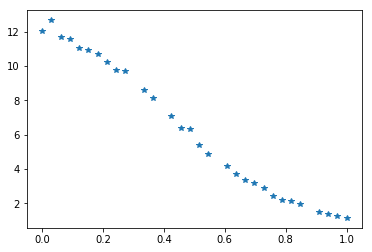

In [211]:
plt.plot(xs, ys, '*')

In [212]:
x_train = np.asarray(np.zeros(25))
x_test = np.asarray(np.zeros(5))
y_train = np.asarray(np.zeros(25))
y_test = np.asarray(np.zeros(5))

In [213]:
for i in range(25):
    x_train[i] = xs[i]
    y_train[i] = ys[i]
for i in range(25, 30):
    x_test[i-25] = xs[i]
    y_test[i-25] = ys[i]

In [219]:
learning_rate = 0.01
training_epochs = 5000
display_step = 100
n_samples = 25

In [220]:
x_train

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.33333333, 0.36363636, 0.42424242, 0.45454545, 0.48484848,
       0.51515152, 0.54545455, 0.60606061, 0.63636364, 0.66666667,
       0.6969697 , 0.72727273, 0.75757576, 0.78787879, 0.81818182])

In [221]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [222]:
a = tf.Variable(np.random.randn(), name='a')
b = tf.Variable(np.random.randn(), name='b')

In [223]:
linear_model = a*x + b
cost = tf.reduce_sum(tf.square(linear_model - y) / (2*n_samples))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [224]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x: x_train, y: y_train})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={x: x_train, y: y_train})
            print("Epoca", str(epoch+1), " - custo", c)
    c = sess.run(cost, feed_dict={x: x_train, y: y_train})
    print("Final", training_epochs, " - custo", c)
    print('a:', sess.run(a))
    print('b:', sess.run(b))

Epoca 100  - custo 9.403546
Epoca 200  - custo 6.651854
Epoca 300  - custo 5.790243
Epoca 400  - custo 5.169805
Epoca 500  - custo 4.62895
Epoca 600  - custo 4.1464925
Epoca 700  - custo 3.7150686
Epoca 800  - custo 3.3291821
Epoca 900  - custo 2.9840162
Epoca 1000  - custo 2.6752727
Epoca 1100  - custo 2.3991082
Epoca 1200  - custo 2.1520858
Epoca 1300  - custo 1.9311295
Epoca 1400  - custo 1.7334898
Epoca 1500  - custo 1.5567048
Epoca 1600  - custo 1.3985744
Epoca 1700  - custo 1.2571317
Epoca 1800  - custo 1.1306136
Epoca 1900  - custo 1.0174452
Epoca 2000  - custo 0.91621906
Epoca 2100  - custo 0.8256746
Epoca 2200  - custo 0.7446839
Epoca 2300  - custo 0.67224085
Epoca 2400  - custo 0.60744166
Epoca 2500  - custo 0.54947996
Epoca 2600  - custo 0.49763474
Epoca 2700  - custo 0.45126003
Epoca 2800  - custo 0.40977892
Epoca 2900  - custo 0.3726759
Epoca 3000  - custo 0.3394875
Epoca 3100  - custo 0.3098015
Epoca 3200  - custo 0.28324792
Epoca 3300  - custo 0.25949615
Epoca 3400  - cu

In [225]:
x_plot = np.linspace(min(xs), max(xs), 30)

In [226]:
y_plot =  12.444 - 12.786*x_plot

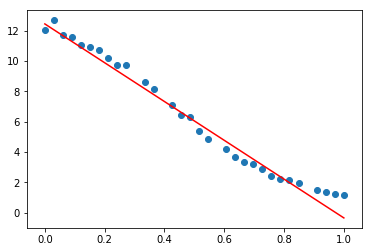

In [227]:
plt.scatter(xs, ys)
plt.plot(x_plot, y_plot, color='red')